In [1]:
import numpy as np
import pandas as pd
from arrow import Arrow
df = pd.read_csv(filepath_or_buffer='/kaggle/input/historical-american-lynching/historical-american-lynching.csv').drop(columns=['Source'])
df['year'] = df['Year'].apply(func=lambda x: np.nan if x == '1900s' else int(x))
df['month'] = df['Mo'].apply(func=lambda x: np.nan if x == '.' or isinstance(x, float) else int(x))
df['day'] = df['Day'].apply(func=lambda x: 15 if x == '.' or isinstance(x, float) else int(x)) # we are fudging a little here
df = df.dropna(subset=['year', 'month'])
df[['year', 'month', 'day']] = df[['year', 'month', 'day']].astype(int)
# we have one special case we need to work around
dates = []
for index, row in df.iterrows():
    dates.append(Arrow(year=row['year'], month=row['month'], day=row['day'] if not (row['month'] == 9 and row['day'] == 31) else 30).date())
df['date'] = dates

df.head()

,State,Year,Mo,Day,Victim,County,Race,Sex,Mob,Offense,Note,2nd Name,3rd Name,Comments,year,month,day,date
0,AL,1904,4,30,Gaines Hall,Autauga,Blk,Male,NaN,Assaulted woman (rape),NaN,NaN,NaN,NaN,1904,4,30,1904-04-30
1,AL,1908,4,5,Walter Clayton,Baldwin,Blk,Male,NaN,Rape,NaN,NaN,NaN,NaN,1908,4,5,1908-04-05
2,AL,1919,6,15,Frank Foukal,Baldwin,Wht,Male,NaN,Murder,NaN,Frank Fokall,Frank Roukal,NaN,1919,6,15,1919-06-15
3,AL,1885,10,21,George Ward,Barbour,Blk,Male,NaN,Murder,NaN,NaN,NaN,NaN,1885,10,21,1885-10-21
4,AL,1911,2,12,Iver Peterson,Barbour,Blk,Male,NaN,Attempted assault (rape),NaN,NaN,NaN,NaN,1911,2,12,1911-02-12


In [2]:
from plotly.express import histogram
histogram(data_frame=df, x='date')

In [3]:
from plotly.express import histogram
histogram(data_frame=df, x='date', facet_col='State', facet_col_wrap=5, color='Race')

In [4]:
histogram(data_frame=df, x='date', color='Race', facet_col='Sex')

In [5]:
histogram(data_frame=df, x='date', color='Sex', facet_col='Race')

In [6]:
histogram(data_frame=df[df['Sex'] == 'Fe'], x='date', color='Race')

In [7]:
df.nunique()

State         10
Year          49
Mo            12
Day           32
Victim      2399
County       543
Race           4
Sex            3
Mob            1
Offense      384
Note           2
2nd Name     778
3rd Name      81
Comments       2
year          49
month         12
day           31
date        2103
dtype: int64

In [8]:
from plotly.express import bar
t_df = df[['State', 'County']].groupby(by=['State', 'County']).size().reset_index().sort_values(ascending=False, by=0).head(n=20)
t_df['State/County'] = [repr(item) for item in list(zip(t_df['State'], t_df['County']))]
bar(data_frame=t_df, x='State/County', y=0, title = 'Top 20 counties')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2803 entries, 0 to 2805
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     2803 non-null   object
 1   Year      2803 non-null   object
 2   Mo        2803 non-null   object
 3   Day       2803 non-null   object
 4   Victim    2803 non-null   object
 5   County    2803 non-null   object
 6   Race      2803 non-null   object
 7   Sex       2803 non-null   object
 8   Mob       155 non-null    object
 9   Offense   2803 non-null   object
 10  Note      276 non-null    object
 11  2nd Name  789 non-null    object
 12  3rd Name  82 non-null     object
 13  Comments  2 non-null      object
 14  year      2803 non-null   int64 
 15  month     2803 non-null   int64 
 16  day       2803 non-null   int64 
 17  date      2803 non-null   object
dtypes: int64(3), object(15)
memory usage: 416.1+ KB


(-0.5, 1199.5, 1199.5, -0.5)

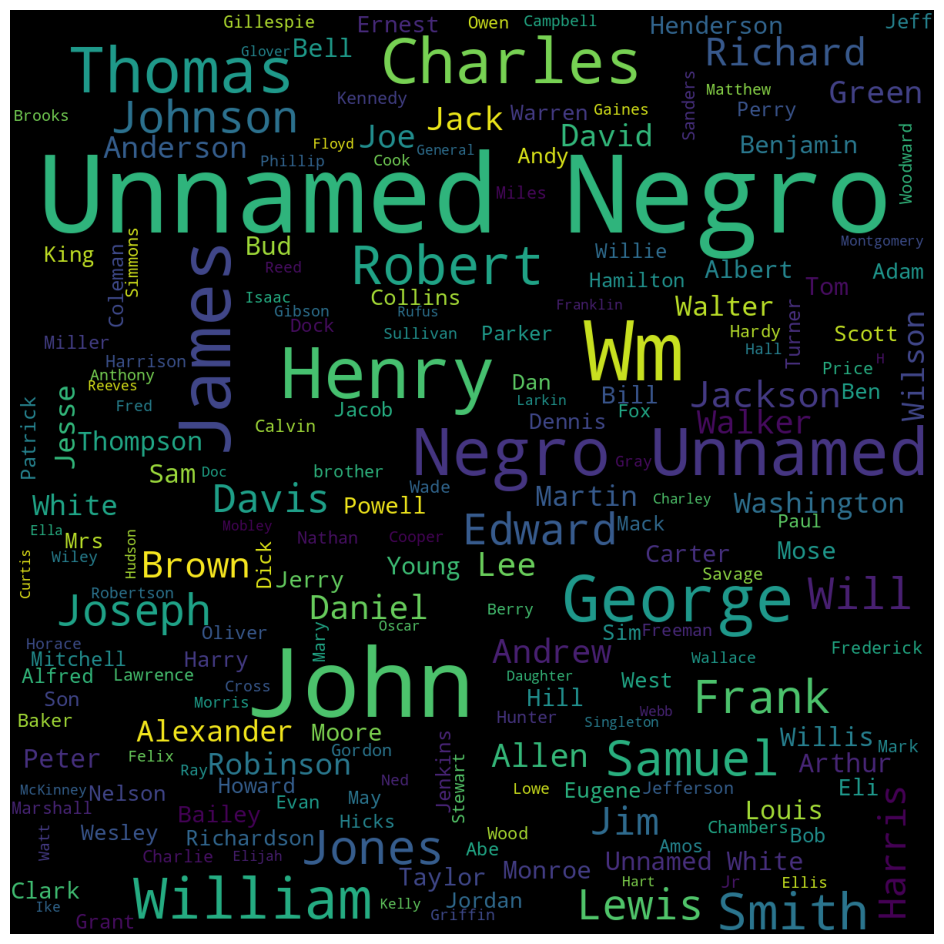

In [10]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
# we want to cut out initials so we need to filter a little
text = ' '.join(item for item in ' '.join(df['Victim'].values).split() if len(item) > 2)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')